## Pair Programming - Regresión lineal 11

### Decision Tree

---

In [7]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
import warnings
warnings.filterwarnings('once')

### Probamos nuestro decision Tree con el csv estandarizado y la var respuesta normalizada

In [8]:
df= pd.read_csv('../archivos/metro_D_stan_enco.csv', index_col=0)

In [9]:
df.sample()

,index,season,cat_time,weekday,holiday_cat,traffic_volume,traffic_box,temp_c,snow_1h
12537,12537,1,3,2,2,6028,576.706076,-1.236327,-0.027233


In [10]:
df_1 = df.drop(["index", "traffic_volume"],axis=1)

In [11]:
#Separamos las variables

X = df_1.drop("traffic_box", axis = 1)
y = df_1["traffic_box"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
arbol = DecisionTreeRegressor(random_state =0)

arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [15]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
# plt.show()

In [16]:
max_features = np.sqrt(len(x_train.columns))
max_features

2.449489742783178

In [17]:
print(arbol.tree_.max_depth)

53


In [18]:
param = {"max_depth": [2,4,6], #Como tenemos 53 y quitarle solo 5 nos parece una locura vamos a ponerlo en 14
        "max_features": [1,2],
        "min_samples_split": [20, 100, 200],
        "min_samples_leaf": [20,100, 200]} 

In [19]:
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= param, 
            cv=10, 
            verbose=-1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [20]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2],
                         'min_samples_leaf': [20, 100, 200],
                         'min_samples_split': [20, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [21]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=6, max_features=2, min_samples_leaf=20,
                      min_samples_split=20)

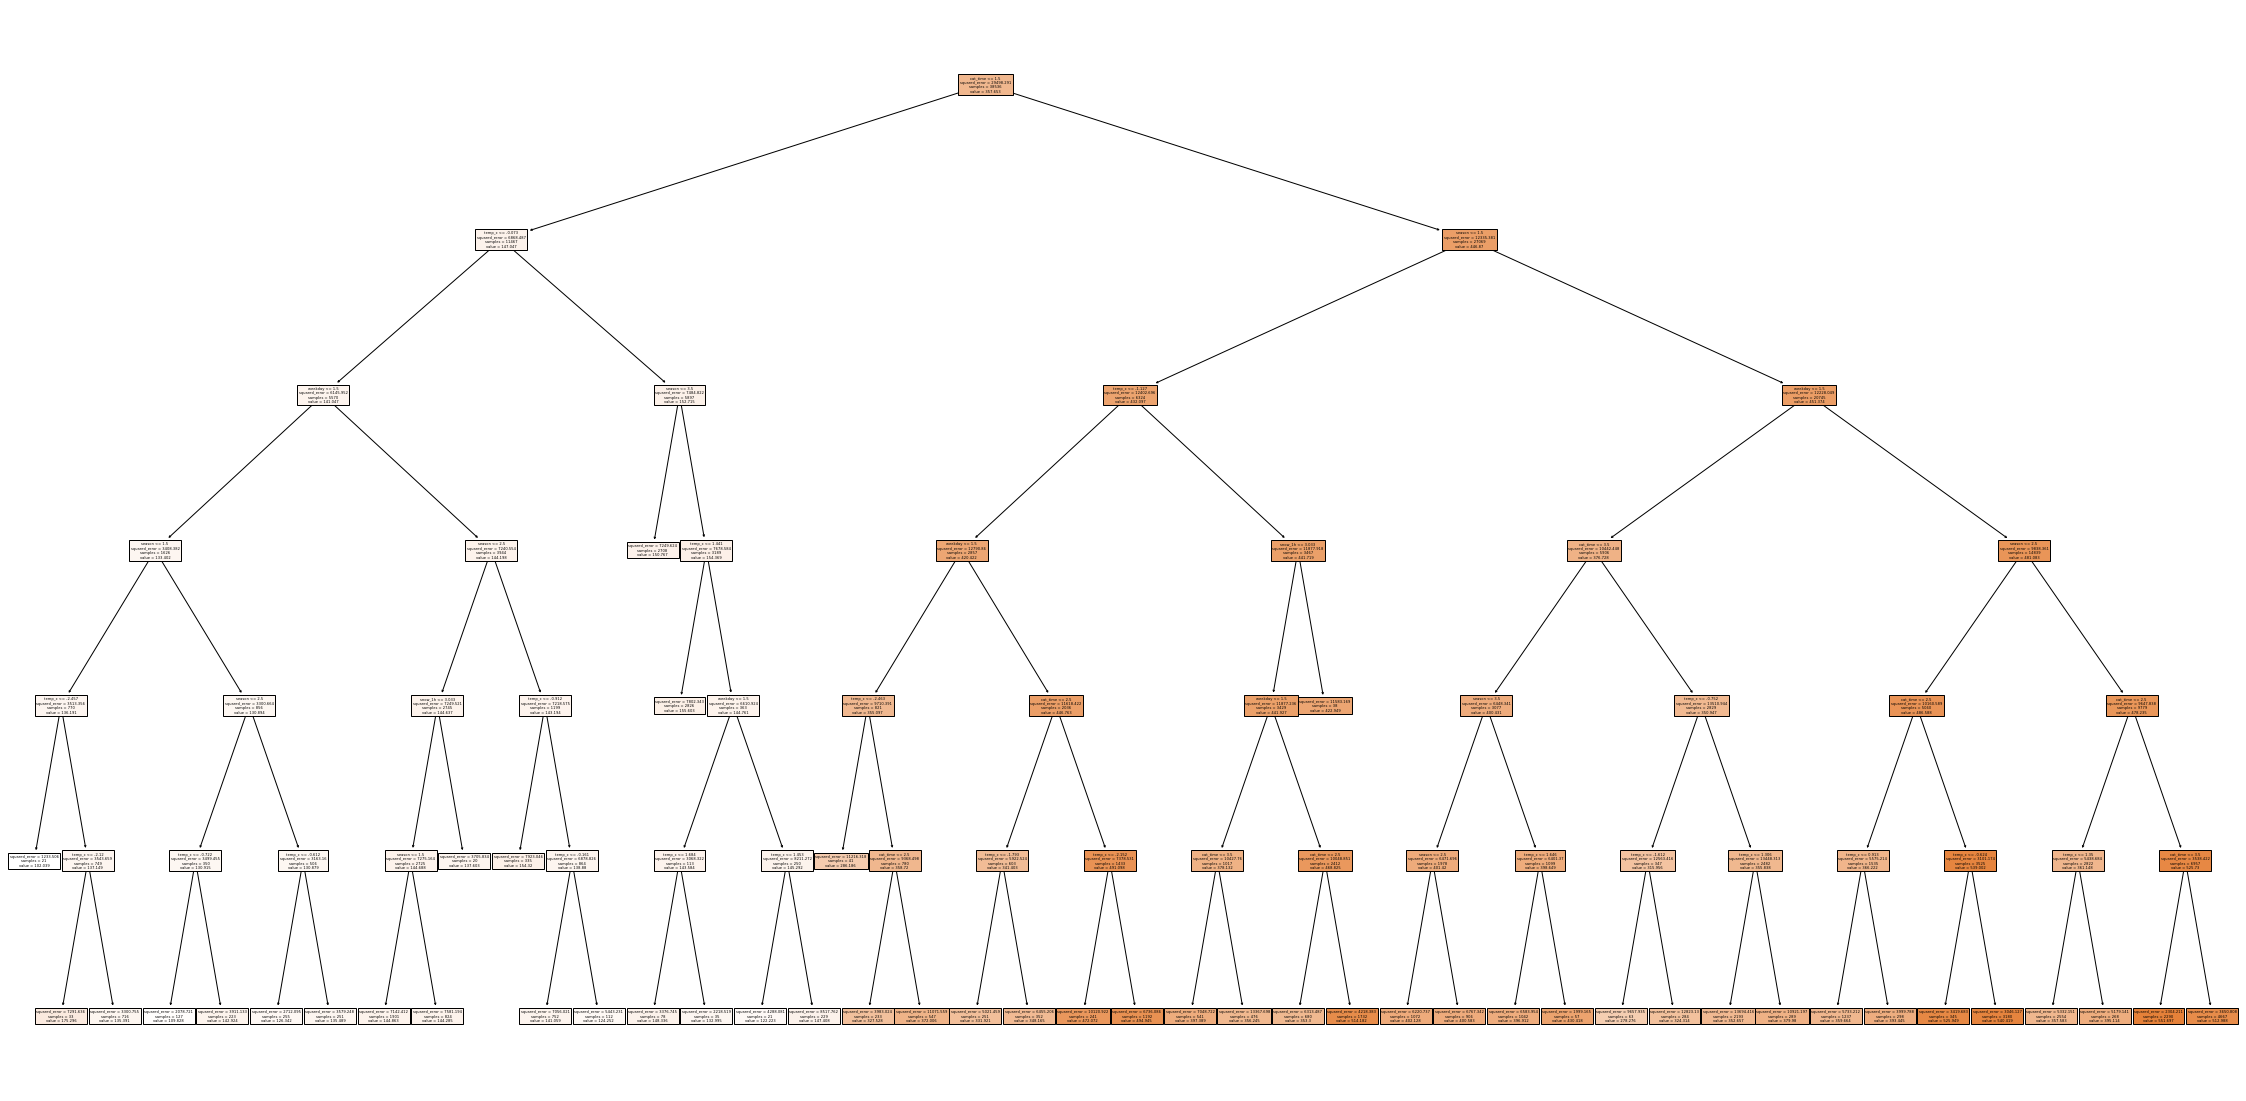

In [22]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [23]:
y_pred_test_dt = mejor_modelo.predict(x_test)
y_pred_train_dt = mejor_modelo.predict(x_train)

In [24]:
predic_test_df= pd.DataFrame(y_pred_test_dt)

In [25]:
predic_train_df= pd.DataFrame(y_pred_train_dt)

In [26]:
predicciones = pd.concat([predic_train_df,predic_test_df], axis=1)
predicciones.columns = ["predic_train", "predic_test"]

In [27]:
predicciones.head(2)

,predic_train,predic_test
0,357.583316,135.390578
1,353.300093,359.664429


In [28]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [29]:
dt_results = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree I")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,59.762811,6080.942655,77.980399,0.793346,test,Decision tree I
1,59.369286,6104.246721,78.129679,0.793064,train,Decision tree I


En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal. El objetivo de hoy es:

- Ajustar el modelo a un Decision Tree

- Extraer las métricas

- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)